## 02: Data Preparation

1. Here we construct our dataset for use in the experiment.

In [1]:
# import required libraries
import sys
sys.path.append('../../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import libs.utils as utils
import libs.bounding_box as bounding_box
import libs.patch_tools as patch_tools
import libs.data_prep as data_prep
import libs.train_test_split as tts
import libs.importing as importing
import libs.render as render
import libs.stats as stats
import libs.patch_tools as patch_tools
from importlib import reload


# set the random seed for we always get the same results (for now)
random.seed(42)


In [2]:
# GENERATE DATASET ID
exp_id = utils.short_id()
# use same data
exp_id = '6ceac90d'
print('ID: {}'.format(exp_id))

ID: 6ceac90d


In [3]:
# COPY DATA and SETUP EXPERIMENT
base_dir = '../source_dataset/good_v1'
data_prep.setup_experiment(base_dir, exp_id)

In [4]:
# 2-CLASS PROBLEM : Benign v. Papilloma

# SETUP : GET ALL CONTOURS
roi_df = pd.read_csv(os.path.join(exp_id, 'contours.csv'))
roi_2class = roi_df.copy()

# SELECT : only benign and papilloma labeled contours
roi_2class = roi_2class[roi_2class.label.isin([1,2])].reset_index(drop=True)
train2bp_df, test2bp_df, val2bp_df = tts.train_test_validation_split(roi_2class, classes=[1,2], samples=3)

# SAVE : save the results
train2bp_df.to_csv(os.path.join(exp_id, 'contours_train.csv'), index=False)
test2bp_df.to_csv(os.path.join(exp_id, 'contours_test.csv'), index=False)
val2bp_df.to_csv(os.path.join(exp_id, 'contours_val.csv'), index=False)

n: 32
distribution: [1 2] [21 11]
classes: [1 2], samples_per_class: 3
train-n: 20
test-n: 6
val-n: 6


In [3]:
# OR IF we've already run this notebook before we can just load the data
train2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_train.csv'))
test2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_test.csv'))
val2bp_df = pd.read_csv(os.path.join(exp_id, 'contours_val.csv'))

In [5]:
# LOG : show all the contours we dumped and those we are using
#       these are logged at: 
#       [dumped] ./exp_id/log/eleminated_contours
#       [kept]   ./exp_id/log/experiment_contours
data_prep.show_contours_for_experiment(exp_id, roi_df, roi_2class)

total contours: 65
eliminated contours: 33
kept contours: 32


image_id        id          name  label
0   hgv-44a1f2e3  2dd43905  2dd43905.csv      4
1   hgv-453fea32  d50cc4f8  d50cc4f8.csv      4
2   hgv-2cdb69f6  8206157b  8206157b.csv      3
3   hgv-2cdb69f6  1c013836  1c013836.csv      3
4   hgv-6d2317b0  ed68be3f  ed68be3f.csv      4
5   mdi-9abd4637  ad1b57ba  ad1b57ba.csv      4
6   mdi-9abd4637  a587fb0a  a587fb0a.csv      4
7   mdi-9abd4637  3461fc88  3461fc88.csv      4
8   mdi-e3b0c312  86a09485  86a09485.csv      4
9   mdi-e3b0c312  319a6d2d  319a6d2d.csv      4
10  mdi-1061cc91  fc982917  fc982917.csv      3
11  mdi-1061cc91  56ad66ea  56ad66ea.csv      3
12  mdi-461bdebc  7a876ffc  7a876ffc.csv      4
13  mdi-461bdebc  c9454f57  c9454f57.csv      4
14  mdi-945f5ac6  c344443d  c344443d.csv      4
15  mdi-f5cb6906  f521a3e0  f521a3e0.csv      4
16  mdi-f5cb6906  84751607  84751607.csv      4
17  mdi-df9a656f  40b3ce8d  40b3ce8d.csv      4
18  mdi-df9a656f  f492e96f  f492e96f.csv      4
19  mdi-df9a656f  d6675d6a  d6675d6a.csv      4
20  mdi-b731a91f  45b886e2  45b886e2.csv      4
21  mdi-b731a91f  93cdba18  93cdba18.csv      4
22  mdi-b731a91f  c32037c6  c32037c6.csv      4
23  mdi-9ce9698b  e3385444  e3385444.csv      4
24  mdi-9ce9698b  b4529522  b4529522.csv      4
25  mdi-9ce9698b  2bac5541  2bac5541.csv      4
26  mdi-5e3d3832  9bb4c49e  9bb4c49e.csv      4
27  mdi-5e3d3832  83fc7472  83fc7472.csv      4
28  mdi-f3f9ede5  7ce56377  7ce56377.csv      4
29  mdi-f3f9ede5  8bfb34ca  8bfb34ca.csv      4
30  odi-1767f1a2  efe502d8  efe502d8.csv      4
31  odi-8ad90fea  85063d46  85063d46.csv      3
32  odi-2511b830  5d2996e2  5d2996e2.csv      3

In [5]:
# TRAIN : data setup
#       : creates a directory ./exp_id/train/  where all the images and contours for training are stored
#       : creates a directory ./exp_id/train/log/info, where the contours and labels for the training set are stored as images for debugging purposes. 
train_df  = pd.read_csv(os.path.join(exp_id, 'contours_train.csv'))
data_prep.setup_component(exp_id, train_df, 'train')
data_prep.log_component_info(os.path.join(exp_id, 'train'))

In [6]:
# TEST : data setup
#       : creates a directory ./exp_id/test/  where all the images and contours for test data are stored
#       : creates a directory ./exp_id/test/log/info, where the contours and labels for the test set are stored as images for debugging purposes.
test_df = pd.read_csv(os.path.join(exp_id, 'contours_test.csv'))
data_prep.setup_component(exp_id, test_df, 'test')
data_prep.log_component_info(os.path.join(exp_id, 'test'))

In [7]:
# VALIDATION : data setup
#       : creates a directory ./exp_id/val/  where all the images and contours for validation data are stored
#       : creates a directory ./exp_id/val/log/info, where the contours and labels for the validation set are stored as images for debugging purposes.
val_df = pd.read_csv(os.path.join(exp_id, 'contours_val.csv'))
data_prep.setup_component(exp_id, val_df, 'val')
data_prep.log_component_info(os.path.join(exp_id, 'val'))

In [8]:
# GENERATE PATCHES : training data
#                    logs information to ./exp_id/train/log/setup_patches, where it shows patches on the image before and after removal

# threshold : the percentage a patch needs to overlap with the contour polygon in order to not be discarded
# patch_overlap : the shift size, should be a value which generates a factor of 64 for instance 0.5*64 = 32, or 0.25 * 64 = 16, etc.
train_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'train'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

# inspect the structure of our patches.csv file
display(train_patches_df.head())

# see how many training patches we have 
print('count: {}'.format(len(train_patches_df)))

image_id contour_id  patch_id    patch_name     x    y label_id
0  hgv-44a1f2e3   3cde1351  1409be74  1409be74.jpg  1279  168        1
1  hgv-44a1f2e3   3cde1351  b158cf43  b158cf43.jpg  1311  168        1
2  hgv-44a1f2e3   3cde1351  b332a9b1  b332a9b1.jpg  1279  200        1
3  hgv-44a1f2e3   3cde1351  9a741507  9a741507.jpg  1311  200        1
4  hgv-44a1f2e3   3cde1351  933d8eb2  933d8eb2.jpg  1343  200        1

count: 893


In [9]:
# GENERATE PATCHES : test data
#                    logs information to ./exp_id/test/log/setup_patches, where it shows patches on the image before and after removal
test_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'test'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(test_patches_df.head())
print('count: {}'.format(len(test_patches_df)))

image_id contour_id  patch_id    patch_name     x    y label_id
0  hgv-99fc12a1   51b064d6  3b9fb85e  3b9fb85e.jpg  1214  306        2
1  hgv-99fc12a1   51b064d6  dbdd858c  dbdd858c.jpg  1246  306        2
2  hgv-99fc12a1   51b064d6  e6ea1bc5  e6ea1bc5.jpg  1278  306        2
3  hgv-99fc12a1   51b064d6  f24852af  f24852af.jpg  1310  306        2
4  hgv-99fc12a1   51b064d6  23ca1ac6  23ca1ac6.jpg  1214  338        2

count: 298


In [10]:
# GENERATE PATCHES : validation data
#                    logs information to ./exp_id/val/log/setup_patches, where it shows patches on the image before and after removal
val_patches_df = data_prep.setup_patches_for(os.path.join(exp_id, 'val'), patch_size = 64, patch_overlap = 0.5, threshold = 0.5)

display(val_patches_df.head())
print('count: {}'.format(len(val_patches_df)))

image_id contour_id  patch_id    patch_name     x    y label_id
0  hgv-2d4a6a46   2a8db1fa  c9be44e8  c9be44e8.jpg  1464  536        2
1  hgv-2d4a6a46   2a8db1fa  e3272187  e3272187.jpg  1432  568        2
2  hgv-2d4a6a46   2a8db1fa  1e1307a6  1e1307a6.jpg  1464  568        2
3  hgv-2d4a6a46   2a8db1fa  0126e4be  0126e4be.jpg  1496  568        2
4  hgv-2d4a6a46   2a8db1fa  acd66b19  acd66b19.jpg  1400  600        2

count: 321


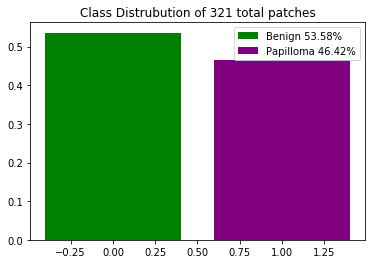

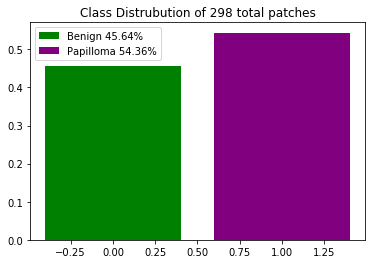

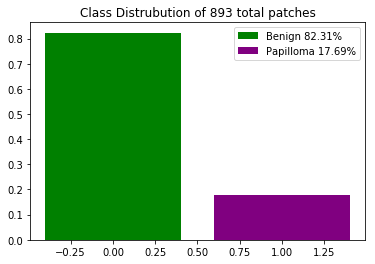

In [11]:
# BEFORE FILTERING PATCHES LOOK AT PATCH DISTRIBUTION
stats.plot_label_distribution(val_patches_df, labels=[1,2], label_key='label_id')
stats.plot_label_distribution(test_patches_df, labels=[1,2], label_key='label_id')
stats.plot_label_distribution(train_patches_df, labels=[1,2], label_key='label_id')

In [12]:
# FILTER PATCHES : some patches have way too much light or are just bad quality
#                  here we filter out patches which are so specular they contain very little information
#                  see: filtered patches are drawn onto the image at : ./exp_id/{train,test,val}/log/filter_highlight_patches - useful for debugging

train_dir = os.path.join(exp_id, 'train')
test_dir = os.path.join(exp_id, 'test')
val_dir = os.path.join(exp_id, 'val')

data_prep.filter_highlight_patches_for(train_dir, patch_size = 64, threshold=0.5)
data_prep.filter_highlight_patches_for(test_dir, patch_size = 64, threshold=0.5)
data_prep.filter_highlight_patches_for(val_dir, patch_size = 64, threshold=0.5)


bad patches: 2
before: 893
cleaned: 891
bad patches: 0
before: 298
cleaned: 298
bad patches: 1
before: 321
cleaned: 320


image_id contour_id  patch_id    patch_name     x    y  label_id
0    hgv-2d4a6a46   2a8db1fa  c9be44e8  c9be44e8.jpg  1464  536         2
1    hgv-2d4a6a46   2a8db1fa  e3272187  e3272187.jpg  1432  568         2
2    hgv-2d4a6a46   2a8db1fa  1e1307a6  1e1307a6.jpg  1464  568         2
3    hgv-2d4a6a46   2a8db1fa  0126e4be  0126e4be.jpg  1496  568         2
4    hgv-2d4a6a46   2a8db1fa  acd66b19  acd66b19.jpg  1400  600         2
5    hgv-2d4a6a46   2a8db1fa  5561835d  5561835d.jpg  1432  600         2
6    hgv-2d4a6a46   2a8db1fa  dcb9b169  dcb9b169.jpg  1464  600         2
7    hgv-2d4a6a46   2a8db1fa  7bc40dba  7bc40dba.jpg  1496  600         2
8    hgv-2d4a6a46   2a8db1fa  d3dc0f8a  d3dc0f8a.jpg  1528  600         2
9    hgv-2d4a6a46   2a8db1fa  f6a7343a  f6a7343a.jpg  1368  632         2
10   hgv-2d4a6a46   2a8db1fa  254bd84f  254bd84f.jpg  1400  632         2
11   hgv-2d4a6a46   2a8db1fa  990e52f9  990e52f9.jpg  1432  632         2
12   hgv-2d4a6a46   2a8db1fa  4b869ea5  4b869ea5.jpg  1464  632         2
13   hgv-2d4a6a46   2a8db1fa  a4c3b664  a4c3b664.jpg  1496  632         2
14   hgv-2d4a6a46   2a8db1fa  9622b605  9622b605.jpg  1528  632         2
15   hgv-2d4a6a46   2a8db1fa  57a2b70e  57a2b70e.jpg  1368  664         2
16   hgv-2d4a6a46   2a8db1fa  aed1d3ee  aed1d3ee.jpg  1400  664         2
17   hgv-2d4a6a46   2a8db1fa  00128106  00128106.jpg  1432  664         2
18   hgv-2d4a6a46   2a8db1fa  f8bbe58a  f8bbe58a.jpg  1464  664         2
19   hgv-2d4a6a46   2a8db1fa  565d30d4  565d30d4.jpg  1496  664         2
20   hgv-2d4a6a46   2a8db1fa  613d1e06  613d1e06.jpg  1528  664         2
21   hgv-2d4a6a46   2a8db1fa  fb0404af  fb0404af.jpg  1336  696         2
22   hgv-2d4a6a46   2a8db1fa  fd7e6b23  fd7e6b23.jpg  1368  696         2
23   hgv-2d4a6a46   2a8db1fa  96fb7766  96fb7766.jpg  1400  696         2
24   hgv-2d4a6a46   2a8db1fa  5eb8d5d7  5eb8d5d7.jpg  1432  696         2
25   hgv-2d4a6a46   2a8db1fa  46d439a7  46d439a7.jpg  1464  696         2
26   hgv-2d4a6a46   2a8db1fa  1a2f7b8c  1a2f7b8c.jpg  1496  696         2
27   hgv-2d4a6a46   2a8db1fa  15658ea6  15658ea6.jpg  1336  728         2
28   hgv-2d4a6a46   2a8db1fa  4349f3f1  4349f3f1.jpg  1368  728         2
29   hgv-2d4a6a46   2a8db1fa  a2be7e0c  a2be7e0c.jpg  1400  728         2
..            ...        ...       ...           ...   ...  ...       ...
291  mdi-945f5ac6   09c29991  d99f7ea7  d99f7ea7.jpg   466  600         1
292  mdi-945f5ac6   09c29991  af32782d  af32782d.jpg   498  600         1
293  mdi-945f5ac6   09c29991  e467dc36  e467dc36.jpg   530  600         1
294  mdi-945f5ac6   09c29991  4ee8adda  4ee8adda.jpg   562  600         1
295  mdi-945f5ac6   09c29991  7950a72b  7950a72b.jpg   498  632         1
296  mdi-945f5ac6   09c29991  6d63970e  6d63970e.jpg   530  632         1
297  mdi-945f5ac6   09c29991  72114343  72114343.jpg   562  632         1
298  mdi-945f5ac6   09c29991  0ed2ddc8  0ed2ddc8.jpg   498  664         1
299  mdi-945f5ac6   09c29991  b81c41cb  b81c41cb.jpg   530  664         1
300  odi-2511b830   481d2a42  15105e8d  15105e8d.jpg   640   74         1
301  odi-2511b830   481d2a42  91fc8e73  91fc8e73.jpg   608  106         1
302  odi-2511b830   481d2a42  1024e38a  1024e38a.jpg   640  106         1
303  odi-2511b830   481d2a42  2fc193d8  2fc193d8.jpg   608  138         1
304  odi-2511b830   481d2a42  57458c56  57458c56.jpg   640  138         1
305  odi-2511b830   481d2a42  8578ab6d  8578ab6d.jpg   672  138         1
306  odi-2511b830   481d2a42  4c3c0b07  4c3c0b07.jpg   608  170         1
307  odi-2511b830   481d2a42  18245b34  18245b34.jpg   640  170         1
308  odi-2511b830   481d2a42  c81f6b31  c81f6b31.jpg   672  170         1
309  odi-2511b830   481d2a42  a026f922  a026f922.jpg   608  202         1
310  odi-2511b830   481d2a42  935366d9  935366d9.jpg   640  202         1
311  odi-2511b830   481d2a42  d2350990  d2350990.jpg   672  202         1
312  odi-2511b830   481d2a42  7a1cf65b  7a1cf65b.jpg   608  234         1
313  odi-2511

In [15]:
## READ PATCHES : check to ensure we are ready to go to the next step
trainp_df = pd.read_csv(os.path.join(train_dir, 'patches_cleaned.csv'), index_col=False)
testp_df = pd.read_csv(os.path.join(test_dir, 'patches_cleaned.csv'), index_col=False)
valp_df = pd.read_csv(os.path.join(val_dir, 'patches_cleaned.csv'), index_col=False)

train_pdr = importing.PatchDataReader(os.path.join(train_dir, 'patches'), trainp_df)
test_pdr = importing.PatchDataReader(os.path.join(test_dir, 'patches'), testp_df)
val_pdr = importing.PatchDataReader(os.path.join(val_dir, 'patches'), valp_df)

train_img, train_labels = train_pdr.read_data()
test_img, test_labels = test_pdr.read_data()
val_img, val_labels = val_pdr.read_data()

display('train images: {}'.format(len(train_img)))
display('train labels: {}'.format(len(train_labels)))
display('test images: {}'.format(len(test_img)))
display('test labels: {}'.format(len(test_labels)))
display('val images: {}'.format(len(val_labels)))
display('val labels: {}'.format(len(val_img)))


'train images: 891'

'train labels: 891'

'test images: 298'

'test labels: 298'

'val images: 320'

'val labels: 320'

In [12]:
# CREATE SHUFFLED DATA

## READ PATCHES : check to ensure we are ready to go to the next step
trainp_df = pd.read_csv(os.path.join(train_dir, 'patches_cleaned.csv'), index_col=False)
testp_df = pd.read_csv(os.path.join(test_dir, 'patches_cleaned.csv'), index_col=False)
valp_df = pd.read_csv(os.path.join(val_dir, 'patches_cleaned.csv'), index_col=False)

idxs = data_prep.shuffle_indices(len(trainp_df))
shuffled_train_df = trainp_df.loc[idxs].reset_index(drop=True)
shuffled_train_df.to_csv(os.path.join(train_dir, 'patches_cleaned_shuffled.csv'), index=False)

idxs = data_prep.shuffle_indices(len(testp_df))
shuffled_test_df = testp_df.loc[idxs].reset_index(drop=True)
shuffled_test_df.to_csv(os.path.join(test_dir, 'patches_cleaned_shuffled.csv'), index=False)

idxs = data_prep.shuffle_indices(len(valp_df))
shuffled_val_df = valp_df.loc[idxs].reset_index(drop=True)
shuffled_val_df.to_csv(os.path.join(val_dir, 'patches_cleaned_shuffled.csv'), index=False)



In [15]:
## Visualize the patches
data_prep.log_patch_data_reader(train_dir, train_pdr)
data_prep.log_patch_data_reader(test_dir, test_pdr)
data_prep.log_patch_data_reader(val_dir, val_pdr)

Exception: 6ceac90d/train/patches_cleaned_shuffled.csv is not a directory